In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Classification Algorithms. Part III

- [Grid Search](#Efficiently-searching-for-optimal-hyper-parameters:-GridSearchCV)
- [Searching multiple parameters simultaneously](#Searching-multiple-parameters-simultaneously)
- [Randomized Grid Search](#Randomized-Grid-Search:-Randomized-search-on-hyper-parameters.)

## Efficiently searching for optimal hyper-parameters: GridSearchCV

In [2]:
# load the pima indian dataset
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/pima.csv'
pima = pd.read_csv(url)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# define X and y
feature_cols = ['pregnant','glucose','bp','skin','insulin','bmi','age']
X = pima[feature_cols]
y = pima.label

In [4]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [5]:
len(X_train)

576

In [6]:
# import and instantiate the knn classifier
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()

In [7]:
# import GridSearch
from sklearn.model_selection import GridSearchCV

In [8]:
# define the parameter values that should be searched
k_range = list(range(1, 51))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [9]:
# create a parameter grid dictionary that maps the parameter names to the values that should be searched
param_grid = {'n_neighbors':k_range}
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]}


In [10]:
# instantiate the grid 
grid = GridSearchCV(knn_clf,  # classification model
                    param_grid, # parameter grid dictionary
                    cv=10, # number of folds for cross validation
                    scoring='accuracy', # evaluation metric
                    verbose=4, # Controls the verbosity: the higher, the more messages.
                    n_jobs=-1) # use all your CPUs

In [11]:
# fit the grid 
grid.fit(X_train,y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy', verbose=4)

In [12]:
# optional: put scores into a DataFrame
grid_data = pd.DataFrame(grid.cv_results_)[['mean_test_score', 'params']] # scores into a DataFrame
grid_data

,mean_test_score,params
0,0.680369,{'n_neighbors': 1}
1,0.715245,{'n_neighbors': 2}
2,0.713491,{'n_neighbors': 3}
3,0.746461,{'n_neighbors': 4}
4,0.737689,{'n_neighbors': 5}
5,0.737750,{'n_neighbors': 6}
6,0.739474,{'n_neighbors': 7}
7,0.739474,{'n_neighbors': 8}
8,0.725529,{'n_neighbors': 9}
9,0.732486,{'n_neighbors': 10}


<AxesSubplot:>

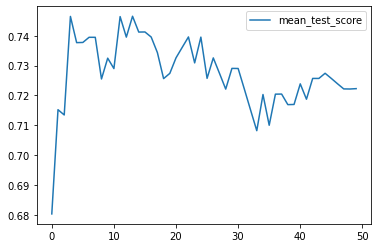

In [13]:
grid_data.plot()

In [14]:
# examine the best model hyperparameters
print(grid.best_score_)
print(grid.best_params_)

0.7465214761040533
{'n_neighbors': 14}


In [15]:
# model with best hyperparameters
best_clf = grid.best_estimator_

In [16]:
# test your best classifier 
y_test_pred = best_clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred)

0.7135416666666666

## Searching multiple parameters simultaneously

knn has a `weights` parameter:
- uniform (uniform weights_. All points in each neighborhood are weighted equally.

- distance (weight points by the inverse of their distance). In this case, closer neighbors  will have a greater influence than neighbors which are further away.

In [17]:
# define the parameter values that should be searched
k_rankge = list(range(1,51))
weights_options = ['uniform','distance']

In [18]:
# create a parameter grid
param_grid = {'n_neighbors' : k_range, 'weights' : weights_options}
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], 'weights': ['uniform', 'distance']}


In [19]:
# instantiate and fit the grid
grid = GridSearchCV(knn_clf,  # classification model
                    param_grid, # parameter grid dictionary
                    cv=10, # number of folds for cross validation
                    scoring='accuracy', # evaluation metric
                    verbose=4, # Controls the verbosity: the higher, the more messages.
                    n_jobs=-1) # use all your CPUs
grid.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=4)

In [20]:
# view the results
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'params']]

,mean_test_score,params
0,0.680369,"{'n_neighbors': 1, 'weights': 'uniform'}"
1,0.680369,"{'n_neighbors': 1, 'weights': 'distance'}"
2,0.715245,"{'n_neighbors': 2, 'weights': 'uniform'}"
3,0.680369,"{'n_neighbors': 2, 'weights': 'distance'}"
4,0.713491,"{'n_neighbors': 3, 'weights': 'uniform'}"
...,...,...
95,0.748306,"{'n_neighbors': 48, 'weights': 'distance'}"
96,0.722172,"{'n_neighbors': 49, 'weights': 'uniform'}"
97,0.750030,"{'n_neighbors': 49, 'weights': 'distance'}"
98,0.722293,"{'n_neighbors': 50, 'weights': 'uniform'}"


In [21]:
# examine the best model hyperparameter
print(grid.best_score_)
print(grid.best_params_)

0.7500302480338779
{'n_neighbors': 49, 'weights': 'distance'}


In [22]:
# best knn model
best_clf = grid.best_estimator_

In [23]:
# test your best classifier 
y_test_pred = best_clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred)

0.71875

## Randomized Grid Search: Randomized search on hyper parameters.

In [24]:
from sklearn.model_selection import RandomizedSearchCV

In [25]:
grid = RandomizedSearchCV(knn_clf,
                          param_grid, 
                          cv=10, 
                          n_iter=20, # number of random sample of combinations
                          scoring='accuracy',
                          verbose=1,
                          n_jobs=-1)
grid.fit(X, y)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29, 30, ...],
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy', verbose=1)

In [26]:
# view the results
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'params']]

,mean_test_score,params
0,0.735748,"{'weights': 'uniform', 'n_neighbors': 34}"
1,0.755297,"{'weights': 'uniform', 'n_neighbors': 17}"
2,0.751418,"{'weights': 'distance', 'n_neighbors': 22}"
3,0.748753,"{'weights': 'distance', 'n_neighbors': 40}"
4,0.712235,"{'weights': 'uniform', 'n_neighbors': 2}"
5,0.755280,"{'weights': 'distance', 'n_neighbors': 16}"
6,0.734450,"{'weights': 'uniform', 'n_neighbors': 31}"
7,0.747368,"{'weights': 'uniform', 'n_neighbors': 12}"
8,0.748735,"{'weights': 'distance', 'n_neighbors': 36}"
9,0.746138,"{'weights': 'distance', 'n_neighbors': 12}"


In [27]:
# examine the best model hyperparameter
print(grid.best_score_)
print(grid.best_params_)

0.7552973342447027
{'weights': 'uniform', 'n_neighbors': 17}


## Searching for optimal parameters with successive halving

These estimators are still experimental

In [28]:
# # explicitly require this experimental feature
from sklearn.experimental import enable_halving_search_cv  # noqa
# now you can import normally from model_selection
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import HalvingRandomSearchCV

In [29]:
grid = HalvingRandomSearchCV(knn_clf, 
                             param_grid, 
                             cv = 5,
                             factor=2, # The ‘halving’ parameter. Factor = 2 means that only half of the combination are selected
                             scoring='accuracy',
                             n_jobs=-1,
                             min_resources=50,
                            )
grid.fit(X_train,y_train)

C:\Users\javier.perez-alvaro\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [       nan 0.60444444 0.58222222 0.58222222        nan 0.56
 0.56       0.60444444        nan 0.60666667        nan]
  warnings.warn(
C:\Users\javier.perez-alvaro\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the train scores are non-finite: [       nan 0.70333333 1.         0.73346154        nan 1.
 1.         0.73371795        nan 1.                nan]
  warnings.warn(
C:\Users\javier.perez-alvaro\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [       nan 0.60444444 0.58222222 0.58222222        nan 0.56
 0.56       0.60444444        nan 0.60666667        nan 0.75
 0.75       0.71789474 0.71789474 0.71789474 0.71789474]
  warnings.warn(
C:\Users\javier.perez-alvaro\Anaconda3\lib\site-packages\sklearn

HalvingRandomSearchCV(estimator=KNeighborsClassifier(), factor=2,
                      min_resources=50, n_jobs=-1,
                      param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7,
                                                           8, 9, 10, 11, 12, 13,
                                                           14, 15, 16, 17, 18,
                                                           19, 20, 21, 22, 23,
                                                           24, 25, 26, 27, 28,
                                                           29, 30, ...],
                                           'weights': ['uniform', 'distance']},
                      scoring='accuracy')

In [30]:
results = pd.DataFrame(grid.cv_results_)
results

,iter,n_resources,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_n_neighbors,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0,50,0.002944,1.224625e-03,0.005941,6.414502e-04,distance,49,"{'weights': 'distance', 'n_neighbors': 49}",NaN,...,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,50,0.002940,1.436531e-03,0.012951,5.625699e-03,uniform,25,"{'weights': 'uniform', 'n_neighbors': 25}",0.8000,...,0.604444,0.139417,14,0.666667,0.775000,0.70000,0.675000,0.700000,0.703333,0.038224
2,0,50,0.002016,5.673332e-05,0.001966,6.642367e-05,distance,30,"{'weights': 'distance', 'n_neighbors': 30}",0.8000,...,0.582222,0.219719,15,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000
3,0,50,0.002171,4.327710e-04,0.002533,4.523572e-04,uniform,6,"{'weights': 'uniform', 'n_neighbors': 6}",0.8000,...,0.582222,0.182925,15,0.692308,0.775000,0.65000,0.775000,0.775000,0.733462,0.052604
4,0,50,0.001999,4.422006e-07,0.003224,1.027134e-03,distance,45,"{'weights': 'distance', 'n_neighbors': 45}",NaN,...,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0,50,0.002138,2.768284e-04,0.001799,3.997805e-04,distance,25,"{'weights': 'distance', 'n_neighbors': 25}",0.8000,...,0.560000,0.191369,17,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000
6,0,50,0.002337,6.763698e-04,0.002138,2.765656e-04,distance,31,"{'weights': 'distance', 'n_neighbors': 31}",0.8000,...,0.560000,0.191369,17,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000
7,0,50,0.002956,6.373348e-04,0.002537,6.947428e-04,uniform,7,"{'weights': 'uniform', 'n_neighbors': 7}",0.8000,...,0.604444,0.185073,13,0.743590,0.775000,0.60000,0.775000,0.775000,0.733718,0.067957
8,0,50,0.002514,8.169713e-04,0.002599,7.998593e-04,uniform,44,"{'weights': 'uniform', 'n_neighbors': 44}",NaN,...,NaN,NaN,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0,50,0.002331,4.205949e-04,0.002399,4.899216e-04,distance,5,"{'weights': 'distance', 'n_neighbors': 5}",0.7000,...,0.606667,0.231111,12,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000


In [31]:
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'params']]

,mean_test_score,params
0,NaN,"{'weights': 'distance', 'n_neighbors': 49}"
1,0.604444,"{'weights': 'uniform', 'n_neighbors': 25}"
2,0.582222,"{'weights': 'distance', 'n_neighbors': 30}"
3,0.582222,"{'weights': 'uniform', 'n_neighbors': 6}"
4,NaN,"{'weights': 'distance', 'n_neighbors': 45}"
5,0.560000,"{'weights': 'distance', 'n_neighbors': 25}"
6,0.560000,"{'weights': 'distance', 'n_neighbors': 31}"
7,0.604444,"{'weights': 'uniform', 'n_neighbors': 7}"
8,NaN,"{'weights': 'uniform', 'n_neighbors': 44}"
9,0.606667,"{'weights': 'distance', 'n_neighbors': 5}"


## Example: Predicting the age of abalone from physical measurements

Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age.

In [32]:
# load abalone data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/abalone.csv'
abalone = pd.read_csv(url)
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [33]:
abalone.Rings.unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

<AxesSubplot:>

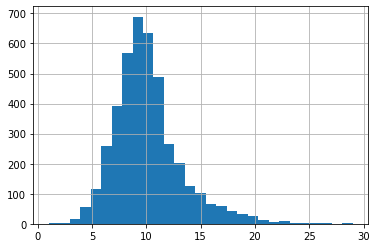

In [34]:
# age/rings distribution
abalone.Rings.hist(bins=29)

In [35]:
# to simplify the problem, let's create age bins:
def age(rings):
    if rings<=5:
        return '<=5'
    elif rings<=10:
        return '6-10'
    elif rings<=15:
        return '11-15'
    else:
        return '>15'

In [36]:
age(15)

'11-15'

In [37]:
abalone['Rings'] = abalone.Rings.apply(age)

In [38]:
abalone.Rings.value_counts()

6-10     2541
11-15    1186
>15       261
<=5       189
Name: Rings, dtype: int64

In [39]:
# feature matrix X/target vector y
X = abalone[['Length','Diameter','Whole weight','Shucked weight','Viscera weight','Shell weight']]
y = abalone.Rings

In [40]:
# train/test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [41]:
# instantiate and fit the grid
grid = GridSearchCV(knn_clf, param_grid, cv=10, scoring='accuracy', verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [42]:
# examine the best model hyperparameter
print(grid.best_score_)
print(grid.best_params_)

0.704002767546448
{'n_neighbors': 22, 'weights': 'uniform'}


In [43]:
best_clf = grid.best_estimator_

In [44]:
y_test_pred = best_clf.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test,y_test_pred,labels=['<5','6-10','11-15','>15'])

array([[  0,   0,   0,   0],
       [  0, 564,  90,   0],
       [  0, 131, 139,  10],
       [  0,   5,  49,   9]], dtype=int64)

C:\Users\javier.perez-alvaro\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


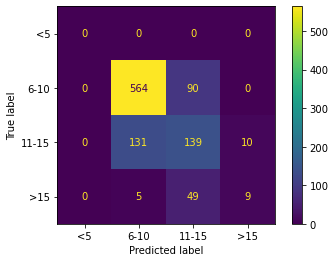

In [46]:
# visualize confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(best_clf, X_test, y_test, labels=['<5','6-10','11-15','>15'])